In [1]:
repo_path = "/Users/johnzhou/research/decision-making"
expt_dir = f"{repo_path}/experiments"
data_dir = f"{repo_path}/data"

## Import packages

In [2]:
import sys
sys.path.append(repo_path)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import torch

from src.data.blocks import RealDataset, SynthDataset
from src.features.build_features import compute_foraging_efficiency
from src.utils import remove_invalid_fits, normalize_features

/Users/johnzhou/anaconda3/envs/ssm/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Preprocess data

In [34]:
expt_name = "prew_0.9"

ql_trials = np.load(f"{data_dir}/processed/{expt_name}/ql_trials.npy")
print(ql_trials.shape)
inf_trials = np.load(f"{data_dir}/processed/{expt_name}/inf_trials.npy")
print(inf_trials.shape)

ql_mse = np.load(f"{data_dir}/processed/{expt_name}/ql_mse_sig.npy")
inf_mse = np.load(f"{data_dir}/processed/{expt_name}/inf_mse_sig.npy")
print(ql_mse.shape)
print(inf_mse.shape)

(50000, 15)
(50000, 15)
(50000, 3)
(50000, 3)


Generate foraging efficiency features

In [35]:
ql_e = compute_foraging_efficiency(ql_trials)
inf_e = compute_foraging_efficiency(inf_trials)

In [36]:
ql_feats = remove_invalid_fits(np.column_stack((ql_mse, ql_e, ql_trials)))
inf_feats = remove_invalid_fits(np.column_stack((inf_mse, inf_e, inf_trials)))

print(ql_feats.shape, inf_feats.shape)

(37716, 19) (44007, 19)


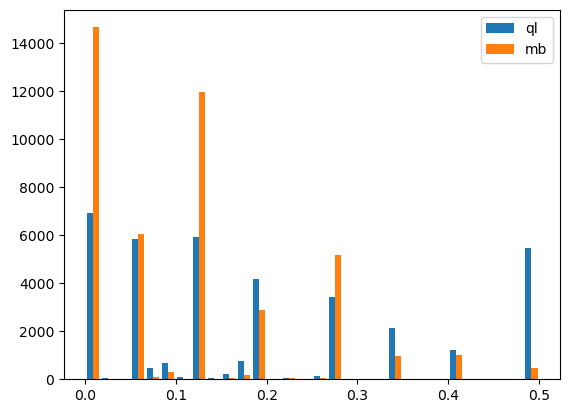

In [37]:
plt.hist([ql_feats[:, 0], inf_feats[:, 0]], bins=30, label=['ql', 'mb'])
plt.legend(loc='upper right')
plt.show()

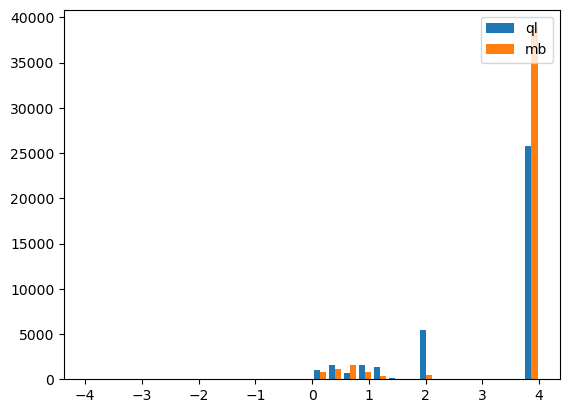

In [38]:
plt.hist([ql_feats[:, 1], inf_feats[:, 1]], bins=30, label=['ql', 'mb'])
plt.legend(loc='upper right')
plt.show()

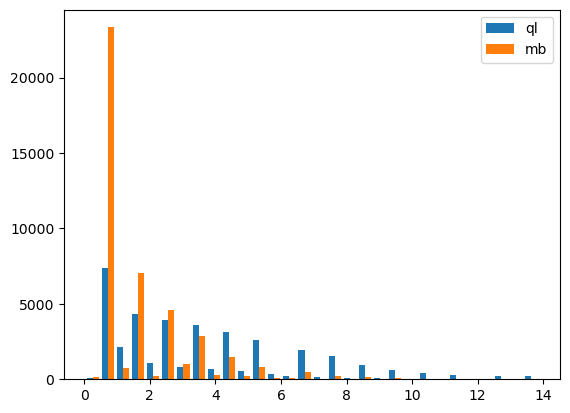

In [39]:
plt.hist([ql_feats[:, 2], inf_feats[:, 2]], bins=30, label=['ql', 'mb'])
plt.legend(loc='upper right')
plt.show()

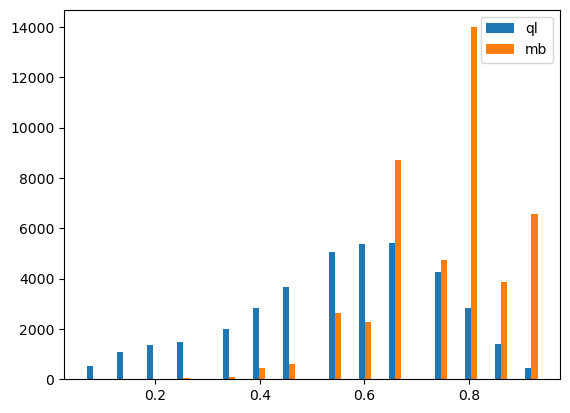

In [40]:
plt.hist([ql_feats[:, 3], inf_feats[:, 3]], bins=30, label=['ql', 'mb'])
plt.legend(loc='upper right')
plt.show()

Create dataset for training

In [18]:
all_feats = np.vstack((ql_feats, inf_feats))
print(all_feats.shape)
np.save(f"{data_dir}/processed/{expt_name}/synth_feats.npy", all_feats)
all_labels = np.hstack((np.zeros(ql_feats.shape[0]), np.ones(inf_feats.shape[0])))
print(all_labels.shape)
np.save(f"{data_dir}/processed/{expt_name}/synth_labels.npy", all_labels)

(8761, 19)
(8761,)


In [19]:
np.load(f"{data_dir}/processed/{expt_name}/synth_labels.npy").shape

(8761,)